In [12]:
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

for n in [14,16,18]: # n
    col = 1
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = []
    row = 5
    k_value = [1,2,3]
    m_value = [i for i in range(1, col + 1)]
    for k in [1]: # interval
        for m in [1]:  # the mth datasets of n
            lw = int((n-1)/2) - (k-1)
            hg = int( (n-1)/2 ) + k
            print( n, k,m, lw, hg)
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg,
                                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" %(n,m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            interval.extend( [(lw, hg) for i in range(row)])
            print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    print( data )
    
    label =[]
    label.extend(["interval"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A2_n%d.csv" %n
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    print( label )
    print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)
            
# solution = [0, 7, 6, 5, 11, 3, 0, 10, 4, 9, 8, 1, 2]
# mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=4, vol= 0.9, num= 2, 
#                                       K = 5, L = 6,datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist12_1")
# mtsp.test_eliminate_cross_in_MTSP( solution )

14 1 1 6 7


[[116.96814710400773, 1.4847400188446045], [118.13520116738196, 1.4860515594482422], [119.31427507395236, 1.4668400287628174], [119.31427507395236, 1.4681589603424072], [119.31427507395236, 1.472452163696289], [119.31427507395236, 1.477095603942871], [119.31427507395236, 1.4850447177886963], [119.31427507395236, 1.4978363513946533], [119.31427507395236, 1.5761795043945312], [119.31427507395236, 1.6934499740600586]]
=== values [[116.96814710400773, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236]]
[[(6, 7), (6, 7), (6, 7), (6, 7), (6, 7)], [116.96814710400773, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236], [1.4847400188446045, 1.4860515594482422, 1.4668400287628174, 1.4681589603424072, 1.472452163696289]]
['interval', 'p1_value', 'p1_time']
[[(6, 7), (6, 7), (6, 7), (6, 7), (6, 7)], [116.96814710400773, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236], [1.4847400188446045, 1.4860515594482422,

[[124.72937843327773, 1.7333924770355225], [124.72937843327773, 1.7363941669464111], [124.72937843327773, 1.7597968578338623], [124.72937843327773, 1.8147614002227783], [129.21479515488522, 1.7362403869628906], [129.85680982459866, 1.7378301620483398], [129.85680982459866, 1.73930025100708], [129.85680982459866, 1.7412638664245605], [129.85680982459866, 1.7459208965301514], [129.85680982459866, 1.7602543830871582]]
=== values [[124.72937843327773, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522]]
[[(7, 8), (7, 8), (7, 8), (7, 8), (7, 8)], [124.72937843327773, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522], [1.7333924770355225, 1.7363941669464111, 1.7597968578338623, 1.8147614002227783, 1.7362403869628906]]
['interval', 'p1_value', 'p1_time']
[[(7, 8), (7, 8), (7, 8), (7, 8), (7, 8)], [124.72937843327773, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522], [1.7333924770355225, 1.7363941669464111

[[130.58200082746342, 2.018817901611328], [130.58200082746342, 2.026777744293213], [131.25362372481766, 2.1385223865509033], [131.57717769928351, 2.0625159740448], [139.69065189729648, 2.0621869564056396], [139.69065189729648, 2.071204423904419], [139.69065189729648, 2.076357126235962], [140.86037724872054, 2.0816266536712646], [145.16639907389057, 2.0328369140625], [146.24212379774599, 2.099066972732544]]
=== values [[130.58200082746342, 130.58200082746342, 131.25362372481766, 131.57717769928351, 139.69065189729648]]
[[(8, 9), (8, 9), (8, 9), (8, 9), (8, 9)], [130.58200082746342, 130.58200082746342, 131.25362372481766, 131.57717769928351, 139.69065189729648], [2.018817901611328, 2.026777744293213, 2.1385223865509033, 2.0625159740448, 2.0621869564056396]]
['interval', 'p1_value', 'p1_time']
[[(8, 9), (8, 9), (8, 9), (8, 9), (8, 9)], [130.58200082746342, 130.58200082746342, 131.25362372481766, 131.57717769928351, 139.69065189729648], [2.018817901611328, 2.026777744293213, 2.138522386550

[0, 10, 6, 11, 9, 1, 0, 2, 8, 7, 5, 3, 4]
1
<class 'numpy.ndarray'>


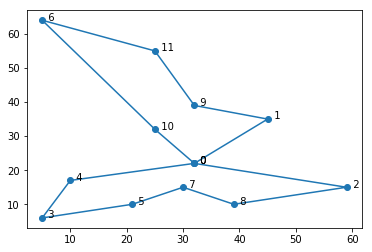

[121 120]


In [21]:
# route
import pandas  as pd
seq = 12
dataset = 4
length = 2
mp = []
for i in range( length ):
    tmp = pd.read_excel('/home/cheng/桌面/dist.xlsx','dist%d_%d_%d' % (seq, dataset, i+1)).values
    mp.append( tmp )

route = []
for k in range( length ):
    tmp = [0]
    i = mp[k][0].tolist().index(1) 
    while i != 0:
        tmp.append( int(i) )
        i = mp[k][i].tolist().index(1)
    route.append( tmp )

result = []
for i in route:
    result.extend( i )
print( result )

# solution = [0, 7, 6, 5, 11, 3, 0, 10, 4, 9, 8, 1, 2]
# result = [0, 7, 6, 5, 3, 11, 0, 10, 4, 9, 8, 1, 2] 

# plot result 
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= length, K = 3, L = 7,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" % (seq, dataset) )
import numpy as np
result = np.array( result )
mtsp.plot_route( result )
mtsp.print_length(result)